Osnabrück University - Machine Learning (Summer Term 2021) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 08

## Introduction

This week's sheet should be solved and handed in before 2:00pm of **Tuesday, June 15, 2021**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Useful python methods

* MLP
    * [classes again](https://docs.python.org/3/tutorial/classes.html)
    * [@property of classes](https://docs.python.org/3/library/functions.html?highlight=property#property)
    * [*: An asterisk in front of an iterable denotes iterable unpacking. Its operand must be an iterable. The iterable is expanded into a sequence of items, which are included in the new tuple, list, or set, at the site of the unpacking.](https://docs.python.org/3/tutorial/controlflow.html#tut-unpacking-arguments)
    * [np.append()](https://numpy.org/doc/stable/reference/generated/numpy.append.html)
    * [reversed()](https://docs.python.org/3/library/functions.html#reversed)
    

## Assignment 0: Math recap (Expectation and Variance) [0 Points]

This exercise is supposed to be very easy but in this and the following sheets we will give points. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is the relation between sample mean and population mean (expectated value)? How to compute it?

YOUR ANSWER HERE

**b)** What is the variance? What does it express? Why is there a square in the formula? What is biased and unbiased sample variance?

YOUR ANSWER HERE

**c)** Can you compute mean and variance of a given 1-dimensional dataset (e.g., $D=\{9,10,11,7,13\}$). Can you do the same for a 3-dimensional dataset (e.g., D=\{(1,10,9), (1,10,10), (10,10,11), (19,10,7), (19,10,13)\})?

20/5 = 4

In [2]:
# YOUR CODE HERE

## Assignment 1: Multilayer Perceptron (MLP) [10 Points]

Last week you implemented a simple perceptron. We discussed that one can use multiple perceptrons to build a network. This week you will build your own MLP. Again the following code cells are just a guideline. If you feel like it, just follow the algorithm steps and implement the MLP yourself.

### Implementation

In the following you will be guided through implementing an MLP step by step. Instead of sticking to this guide, you are free to take a complete custom approach instead if you wish.

We will take a bottom-up approach: Starting from an individual **perceptron** (aka neuron), we will derive a **layer of perceptrons** and end up with a **multilayer perceptron** (aka neural network). Each step will be implemented as its own python *class*. Such a class defines a type of element which can be instantiated multiple times. You can think of the relation between such instances and their designated classes as individuals of a specific population (e.g. Bernard and Bianca are both individuals of the population mice). Class definitions contain methods, which can be used to manipulate instance of that class or to make it perform specific actions.

To guide you along, all required classes and functions are outlined in valid python code with extensive comments. You just need to fill in the gaps. For each method the [docstring](https://www.python.org/dev/peps/pep-0257/#what-is-a-docstring) (the big comment contained by triple quotes at the beginning of the method) describes the arguments that each specific method accepts (`Args`) and the values it is expected to return (`Returns`).

In [3]:
import numpy as np

### Perceptron
Similar to last week you here need to implement a perceptron. But instead of directly applying it, we will define a class which is reusable to instantiate a theoretically infinite amount of individual perceptrons. We will need the following three functionalities:

#### Weight initialization

The weights are initialized by sampling values from a standard normal distribution. There are as many weights as there are values in the input vector and an additional one for the perceptron's bias.

#### Forward-Propagation / Activation

Calculate the weighted sums of a neuron's inputs and apply it's activation function $\sigma$. The output vector $o$ of perceptron $j$ of layer $k$ given an input $x$ (the output of the previous layer) in a neural network is given by the following formula. Note: $N$ gives the number of values of a given vector, $w_{j,0}(k)$ specifies the bias of perceptron $j$ in layer $k$ and $w_{j,1...N(x)}(k)$ the other weights of perceptron $j$ in layer $k$.

$$o_{k,j}(x) = \sigma\left(w_{j,0}(k)+\sum\limits_{i=1}^{N(x)} x_i w_{j,i}(k)\right)$$

Think of the weights $w(k)$ as a matrix being located in-between layer $k$ and the layer located *to its left* in the network. So values flowing from layer $k-1$ to layer $k$ are weighted by the values of $w(k)$. As activation function we will use the sigmoid function because of its nice derivative (needed later):

$$\begin{align*}
\sigma(x) &= \frac{1}{1 + \exp{(-x)}}\\
\frac{d\sigma}{dx}(x) &= \sigma(x) \cdot (1 - \sigma(x))
\end{align*}$$

#### Back-Propagation / Adaptation
In order to learn something the perceptron needs to slowly adjust its weights. Each weight $w_{j,i}$ in layer $k$ is adjusted by a value $\Delta w_{j,i}$ given a learning rate $\epsilon$, the previous layer's output (or, for the first hidden layer, the network's input) $o_{k-1,i}(x)$ and the layer's error signals $\delta(k)$ (which will be calculated by the MultilayerPerceptron):

$$\Delta w_{j,i}(k) = \epsilon\, \delta_j(k) o_{k-1,i}(x)$$

In [4]:
a = np.random.normal(0, 1, 5 + 1)
a

array([-1.50574572, -0.06032534,  0.93458719, -0.45224536,  1.25933619,
        0.47717333])

In [5]:
a[1:-1]

array([-0.06032534,  0.93458719, -0.45224536,  1.25933619])

In [6]:
import numpy as np
import math


# Activation function σ.
# We use scipy's builtin because it fixes some NaN problems for us.
# sigmoid = lambda x: 1 / (1 + np.exp(-x))
from scipy.special import expit as sigmoid


class Perceptron:
    """Single neuron handling its own weights and bias."""
    def sigmoid(x):
        return 1 / (1 + math.exp(-x))
    
    def __init__(self, dim_in, act_func=sigmoid):
        """Initialize a new neuron with its weights and bias.

        Args:
            dim_in (int): Dimensionality of the data coming into this perceptron. 
                In a network of perceptrons this basically represents the 
                number of neurons in the layer before this neuron's layer. 
                Used for generating the perceptron's weights vector, which 
                not only includes one weight per input but also an additional 
                bias weight.
            act_fun (function): Function to apply on activation.
        """
        self.act_func = act_func
        # Set self.weights

        # YOUR CODE HERE
        self.weights = np.random.normal(0, 1, dim_in + 1)

    def activate(self, x):
        """Activate this neuron with a specific input.

        Calculate the weighted sum of inputs and apply the activation function.

        Args:
            x (ndarray): Vector of input values.

        Returns:
            float: A real number representing the perceptron's activation after 
            calculating the weighted sum of inputs and applying the 
            perceptron's activation function.
        """
        # Return the activation value
        # YOUR CODE HERE
        input_sum = np.sum(np.append(1, x) * self.weights.T) 
        return self.act_func(input_sum)

    def adapt(self, x, delta, rate=0.03):
        """Adapt this neuron's weights by a specific delta.

        Args:
            x (ndarray): Vector of input values.
            delta (float): Weight adaptation delta value.
            rate (float): Learning rate.
        """
        # Adapt self.weights according to the update rule
        # YOUR CODE HERE
        print(delta)
        print(x)
        self.weights +=  rate * delta * np.append(1, x)


p = Perceptron(2)
assert p.weights.size == 3, "Should have a weight per input and a bias."
assert isinstance(p.activate([2, 1]), float), "Should activate as scalar."
assert -1 <= p.activate([100, 100]) <= 1, "Should activate using sigmoid."
p.weights = np.array([.5, .5, .5])
p.adapt(np.array([2, 3]), np.array(.5))
assert np.allclose(p.weights, [0.515, 0.53, 0.545]), \
        "Should update weights correctly."

0.5
[2 3]


### PerceptronLayer
A `PerceptronLayer` is a combination of multiple `Perceptron` instances. It mainly is concerened with passing input and delta values to its individual neurons. There is no math to be done here!

#### Initialization

When initializing a `PerceptronLayer` (like this: `layer = PerceptronLayer(5, 3)`), the `__init__` function is called. It creates a list of `Perceptron`s: For each output value there must be one perceptron. Each of those perceptrons receives the same inputs and the same activation function as the perceptron layer.

#### Activation

During the activation step, the perceptron layer activates each of its perceptrons. These values will not only be needed for forward propagation but will also be needed for implementing backpropagation in the `MultilayerPerceptron` (coming up next).

#### Adaptation

To update its perceptrons, the perceptron layer adapts each one with the corresponding delta. For this purpose, the MLP passes a list of input values and a list of deltas to the adaptation function. The inputs are passed to *all* perceptrons. The list of deltas is exactly as long as the list of perceptrons: The first delta is for the first perceptron, the second for the second, etc. The delta values themselves will be computed by the MLP.

In [7]:
class PerceptronLayer:
    """Layer of multiple neurons.
    
    Attributes:
        perceptrons (list): List of perceptron instances in the layer.
    """
    def __init__(self, dim_in, dim_out, act_func=sigmoid):
        """Initialize the layer as a list of individual neurons.

        A layer contains as many neurons as it has outputs, each
        neuron has as many input weights (+ bias) as the layer has inputs.

        Args:
            dim_in (int): Dimensionality of the expected input values,
                also the size of the previous layer of a neural network.
            dim_out (int): Dimensionality of the output, also the requested 
                amount of in this layer and the input dimension of the
                next layer.
            act_func (function): Activation function to use in each perceptron of
                this layer.
        """
        # Set self.perceptrons to a list of Perceptrons
        # YOUR CODE HERE
        self.perceptrons = [Perceptron(dim_in, act_func) for i in range(dim_out)]

    def activate(self, x):
        """Activate this layer by activating each individual neuron.

        Args:
            x (ndarray): Vector of input values.

        Retuns:
            ndarray: Vector of output values which can be 
            used as input to another PerceptronLayer instance.
        """
        # return the vector of activation values
        # YOUR CODE HERE
        return np.array([per.activate(x) for per in self.perceptrons])

    def adapt(self, x, deltas, rate=0.03):
        """Adapt this layer by adapting each individual neuron.

        Args:
            x (ndarray): Vector of input values.
            deltas (ndarray): Vector of delta values.
            rate (float): Learning rate.
        """
        # Update all the perceptrons in this layer
        # YOUR CODE HERE
        for per, delta in zip(self.perceptrons, deltas):
            per.adapt(x, delta, rate)
        
    @property
    def weight_matrix(self):
        """Helper property for getting this layer's weight matrix.

        Returns:
            ndarray: All the weights for this perceptron layer.
        """
        return np.asarray([p.weights for p in self.perceptrons]).T


l = PerceptronLayer(3, 2)
assert len(l.perceptrons) == 2, "Should have as many perceptrons as outputs."
assert len(l.activate([1,2,3])) == 2, "Should provide correct output amount."

### MultilayerPerceptron

#### Forward-Propagation / Activation
Propagate the input value $x$ through each layer of the network, employing the output of the previous layer as input to the next layer.

#### Back-Propagation / Adaptation
This is the most complex step of the whole task. Split into three separate parts:

1. ***Forward propagation***: Compute the outputs for each individual layer – similar to the forward-propagation step above, but we need to keep track of the intermediate results to compute each layer's errors. That means: Store the input as the first "output" and then activate each of the network's layers using the *previous* layer's output and store the layer's activation result.

2. ***Backward propagation***: Calculate each layer's error signals $\delta_i(k)$. The important part here is to do so from the last to the first array, because each layer's error depends on the error from its following layer:

    $$\delta_i(k) = \varphi'_i(k) \sum\limits_{j=1}^{N(k+1)} w_{ji}(k+1,k)\delta_j(k+1)$$

    Since we use the sigmoid function $\sigma(t)=\frac{1}{1+e^{-t}}$ as activation function $\varphi$ the derivative is $\varphi'_i(k) = \sigma'_i(k) = \sigma_i(k)\ (1 - \sigma_i(k))$ and the formula becomes:

    $$\delta_i(k) = \sigma_i(k)\ (1 - \sigma_i(k))\ \sum\limits_{j=1}^{N(k+1)} w_{ji}(k+1,k)\delta_j(k+1)$$

    (*Hint*: For the last layer (i.e. the first you calculate the $\delta$ for) the sum in the formula above is the total network error. For all preceding layers $k$ you need to recalculate `e` using the $\delta$ and weights of layer $k+1$. We already implemented a helper function for you to access the weights of a specific layer. Check the `PerceptronLayer` if you did not find it yet.)

3. ***Adaptation***: Call each layers adaptation function with its input, its designated error signals and the given learning rate.

Hint: The last two steps can be performed in a single loop if you wish, but make sure to use the non-updated weights for the calculation of the next layer's error signals!

In [13]:
class MultilayerPerceptron:
    """Network of perceptrons, also a set of multiple perceptron layers.
    
    Attributes:
        layers (list): List of perceptron layers in the network.
    """
    def __init__(self, *layers):
        """Initialize a new network, madeup of individual PerceptronLayers.

        Args:
            *layers: Arbitrarily many PerceptronLayer instances.
        """
        self.layers = layers

    def activate(self, x):
        """Activate network and return the last layer's output.

        Args:
            x (ndarray): Vector of input values.

        Returns:
            (ndarray): Vector of output values from the last layer of the 
            network after propagating forward through the network.
        """
        # Propagate activation through the network
        # and return output for last layer
        # YOUR CODE HERE
        for l in self.layers:
            x = l.activate(x)
        return x 

    def adapt(self, x, t, rate=0.03):
        """Adapt the whole network given an input and expected output.

        Args:
            x (ndarray): Vector of input values.
            t (ndarray): Vector of target values (expected outputs).
            rate (float): Learning rate.
        """
        # Activate each layer and collect intermediate outputs.
        # * Iterate through all layers and activate them with the output
        #       of the previous layer. 
        # * Create a list with all the outputs.
        # * Call the first layer with the input x
        outputs = []
        outputs.append(x)
        
        for l in self.layers:
            x = l.activate(x)
            outputs.append(x)
        
        outputs = np.array(outputs)
        # Calculate error 'e' between t and network output, i.e
        # the last element of the list of outputs. Here the error
        # is the difference between t and the output.
        # YOUR CODE HERE
        e = t - outputs[-1]
        
        # Backpropagate the error through the network computing
        # the intermediate deltas and adapting each layer.
        # * Reversly iterate through the layers
        # * Get the input of the layer. I.e. the output of the previous layer
        # * Get the output of the layer
        # * Compute delta using the output of the layer and the error.
        #      (Use the derivative of the sigmoid activation function)
        #      (The error for the last layer is computed above)
        # * Compute the error for the previous layer in the network
        #      using the weight matrix and delta
        # * Adapt the layer using the input of the layer, delta and the learning rate
        # YOUR CODE HERE
        layers_rev = list(reversed(self.layers))
        for i,l in enumerate(layers_rev):
            l_input = outputs[-i-2]
            l_output = outputs[-i-1]  
            delta = (l_output * (1 - l_output)) * e
            e = (l.weight_matrix @ delta)[1:]
            l.adapt(l_input, delta, e)
            

### Classification

#### Problem Definition
Before we start, we need a problem to solve. In the following cell we first generate some three dimensional data (= $\text{input_dim}$) between 0 and 1 and label all data according to a binary classification: If the data is close to the center (radius < 2.5), it belongs to one class, if it is further away from the center it belongs to the other class.

In the cell below we visualize the data set.

In [14]:
def uniform(a, b, n=1):
    """Returns n floats uniformly distributed between a and b."""
    return (b - a) * np.random.random_sample(n) + a


n = 1000
radius = 5
r = np.append(uniform(0, radius * .5, n // 2),
              uniform(radius * .7, radius, n // 2))
angle = uniform(0, 2 * np.pi, n)
x = r * np.sin(angle) + uniform(-radius, radius, n)
y = r * np.cos(angle) + uniform(-radius, radius, n)
inputs = np.vstack((x, y)).T
targets = np.less(np.linalg.norm(inputs, axis=1), radius * .5)

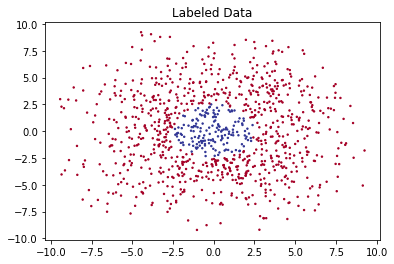

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(num='Data')
ax.set(title='Labeled Data')
ax.scatter(*inputs.T, 2, c=targets, cmap='RdYlBu')
plt.show()

### Model Design
The following cell already contains a simple model with a single layer. Play around with some different configurations!

In [16]:
MLP = MultilayerPerceptron(
    PerceptronLayer(2, 1),
)
# Adapt this MLP
# YOUR CODE HERE
MLP = MultilayerPerceptron(
    PerceptronLayer(3, 3),
    PerceptronLayer(2, 2),
    PerceptronLayer(3, 3),
)

### Training
Train the network on random samples from the data. Try adjusting the epochs and watch the training performance closely using different models.

<IPython.core.display.Javascript object>


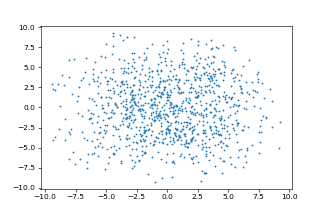

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

In [17]:
%matplotlib notebook
from matplotlib import cm

EPOCHS = 200000

max_accuracy = 0

fig, ax = plt.subplots(num='Training')
scatter = ax.scatter(*inputs.T, 2)
plt.show()

for epoch in range(1, EPOCHS + 1):
    sample_index = np.random.randint(0, len(targets))
    MLP.adapt(inputs[sample_index], targets[sample_index])

    if (epoch % 2500) == 0:
        outputs = np.squeeze([MLP.activate(x) for x in inputs])
        predictions = np.round(outputs)
        accuracy = np.sum(predictions == targets) / len(targets) * 100
        if accuracy > max_accuracy:
            max_accuracy = accuracy
        scatter.set_color(cm.RdYlBu(outputs))
        ax.set(title=f'Training {epoch / EPOCHS * 100:.0f}%: {accuracy:.2f}%. Best accuracy: {max_accuracy:.2f}%')
        fig.canvas.draw()

### Evaluation

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0, 0].scatter(*inputs.T, 2, c=outputs, cmap='RdYlBu')
ax[0, 0].set_title('Continuous Classification')
ax[0, 1].set_title('Discretized Classification')
ax[0, 1].scatter(*inputs.T, 2, c=np.round(outputs), cmap='RdYlBu')
ax[1, 0].set_title('Original Labels')
ax[1, 0].scatter(*inputs.T, 2, c=targets, cmap='RdYlBu')
ax[1, 1].set_title('Wrong Classifications')
ax[1, 1].scatter(*inputs.T, 2, c=(targets != np.round(outputs)), cmap='OrRd')
plt.show()

## Results
Document your results in the following cell. We are interested in which network configurations you tried and what accuracies they resulted in. Did you run into problems during training? Was it steady or did it get stuck? Did you recognize anything about the training process? How could we get better results? Tell us!

YOUR ANSWER HERE

## Assignment 2: Training a MLP by hand [8 Points]

In the following exercises you will perform a training step for the simple multilayer perceptron depicted below:
![mlp.png](mlp.png)

Start with the input vector $\vec{x}=(1, 2)$. The expected output/label for this input vector/training example is $\vec{t} = (4)$. The learning rate is set to $\eta=1$.

For this assignment you may write your solutions by hand, scan/photograph them, and upload them to StudIP.

Instead of a sigmoid function as activation function we will use rectified linear units defined as follows:

$$
    \varphi(x)=\max(0,x)
$$
![relu.png](relu.png)

The derivative is 

$$
\varphi' \begin{cases}1&{\text{if }}x>0,\\0&{\text{otherwise}}.\end{cases}
$$
![drelu.png](drelu.png)

**a)** Start by creating a connectivity matrix. Use the appropriate weights from the graphic of the MLP above. Use ”−“ to denote missing connections. Fill in the top left cell, i.e. explain what rows and columns
describe.

?\?    |1  |2  |3  |4  |5
---    |---|---|---|---|---
1      |?  |?  |?  |?  |?
2      |?  |?  |?  |?  |?
3      |?  |?  |?  |?  |?
4      |?  |?  |?  |?  |?
5      |?  |?  |?  |?  |?

YOUR ANSWER HERE

Compute the feed forward step for the input vector $\vec{x}=(1, 2)$. I.e., set/compute the input and output of the 5 neurons of the MLP.

n  |i  |o
---|---|---
1  |?  |?
2  |?  |?
3  |?  |?
4  |?  |?
5  |?  |?

YOUR ANSWER HERE

Next compute the error for the training example with expected output $t=4$. Use the standard perceptron error function.

YOUR ANSWER HERE

Now perform backpropagation to train the network. Compute weight updates ONLY for $\Delta w_{31}$ and $\Delta w_{53}$. Use the learning rate $\eta=1$ 

YOUR ANSWER HERE

## Assignment 3: The Tensorflow Playground [2 Points]


With the online tool [TensorFlow playground](http://playground.tensorflow.org/) it is possible to interactively play with feed forward neural networks, compellingly visualize their behavior and share specific configurations. 

Follow [this link](http://playground.tensorflow.org/#activation=sigmoid&batchSize=1&dataset=gauss&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=1&seed=0.56339&showTestData=true&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&learningRate_hide=false&regularizationRate_hide=true&percTrainData_hide=true&batchSize_hide=true&dataset_hide=false&regularization_hide=true&discretize_hide=true&stepButton_hide=false&showTestData_hide=false&problem_hide=true&noise_hide=true&activation_hide=true) to the TensorFlow playground. If you click it, many features are disabled and set to useful defaults, since they were either not discussed yet in the lecture or are not important for this exercise.

You will see a simple configuration: Two activated inputs ($x_1$ and $x_2$), one hidden layer with one neuron (which can be understood as a simple perceptron) and the output shown as a nice picture. It initially shows a training loss of 0.527. Try and run it to see how the perceptron can learn to separate the two clusters. Note that for the rest of the exercise we assume at most about 1000 learning steps (usually many fewer will do it), so don't wait too long in front of your browser.

The dataset gets fully classified after very few iterations. Next try the XOR dataset, either by clicking on it on the left (the top right data pattern) or by following [this link](http://playground.tensorflow.org/#activation=sigmoid&batchSize=1&dataset=xor&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=1&seed=0.56339&showTestData=true&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&learningRate_hide=false&regularizationRate_hide=true&percTrainData_hide=true&batchSize_hide=true&dataset_hide=false&regularization_hide=true&discretize_hide=true&stepButton_hide=false&showTestData_hide=false&problem_hide=true&noise_hide=true&activation_hide=true). You will notice that you won't achieve much better results than a loss of 0.4, which is just above chance. Try to improve the result by adding neurons and or layers (but don't change the inputs!) until you get a classification with a loss smaller than 0.01. You may also change the learning rate. Then copy the link from your browser address bar and paste it below:

[XOR](http://playground.tensorflow.org/#activation=sigmoid&batchSize=1&dataset=xor&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=4,4&seed=0.56339&showTestData=true&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&learningRate_hide=false&regularizationRate_hide=true&percTrainData_hide=true&batchSize_hide=true&dataset_hide=false&regularization_hide=true&discretize_hide=true&stepButton_hide=false&showTestData_hide=false&problem_hide=true&noise_hide=true&activation_hide=true)

How many neurons in hidden layers are already sufficient to get at least 99% classification (i.e. loss < 0.01) if they are a) in one hidden layer or b) in two hidden layers? You may consider configurations which just need above 1000 iterations to get there as well, but we don't expect you to run any configuration longer than 1000 iterations.

1 Layer with 5 Neurons 

2 Layers with 4 Neurons in total (so 2 and 2)